In [624]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [625]:
df = pd.read_csv('data/train_.csv')
df.columns

Index(['header_details', 'address', 'latitude', 'longitude', 'user_name',
       'user_url', 'tel_number', 'price_dollars', 'Тип предложения', 'Серия',
       'Дом', 'Этаж', 'Площадь', 'Отопление', 'Состояние', 'Санузел', 'Газ',
       'Входная дверь', 'Парковка', 'Высота потолков', 'Разное',
       'Правоустанавливающие документы', 'views', 'hearts', 'publicated',
       'upped', 'pictures', 'Телефон', 'Интернет', 'Балкон', 'Мебель', 'Пол',
       'Безопасность', 'Возможность обмена', 'Возможность рассрочки',
       'Возможность ипотеки', 'num_of_comments', 'Площадь участка',
       'Канализация', 'Питьевая вода', 'Электричество'],
      dtype='object')

In [626]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3367 entries, 0 to 3366
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   header_details                  3364 non-null   object 
 1   address                         3367 non-null   object 
 2   latitude                        3364 non-null   float64
 3   longitude                       3364 non-null   float64
 4   user_name                       3367 non-null   object 
 5   user_url                        3367 non-null   object 
 6   tel_number                      3364 non-null   object 
 7   price_dollars                   3367 non-null   float64
 8   Тип предложения                 3364 non-null   object 
 9   Серия                           3364 non-null   object 
 10  Дом                             3364 non-null   object 
 11  Этаж                            3361 non-null   object 
 12  Площадь                         33

In [627]:
df.shape

(3367, 41)

In [628]:
df.drop(columns=['Канализация', 'Питьевая вода', 'Электричество'], inplace=True)
df.drop(columns=['views', 'hearts', 'user_name', 'user_url', 'tel_number', 'views', 'hearts', 'publicated', 'pictures', 'num_of_comments'], inplace=True)

df.shape

(3367, 30)

In [629]:
df.dropna(subset=['header_details'], inplace=True)
df['Комнаты'] = df['header_details'].str.extract(r'(\d)-комн\. кв\.')
df['Комнаты'].fillna(6, inplace=True)
df['Комнаты'] = df['Комнаты'].astype(int)
df.drop(columns=['header_details'], inplace=True)

In [630]:
df.dtypes[df.dtypes != 'object']

latitude         float64
longitude        float64
price_dollars    float64
Комнаты            int32
dtype: object

In [631]:
df['latitude'].isna().sum()

0

In [632]:
df['latitude'].corr(df['price_dollars'])

0.02696745808678022

In [633]:
df.drop(columns=['latitude'], inplace=True)

In [634]:
df['longitude'].isna().sum()

0

In [635]:
df['longitude'].corr(df['price_dollars'])

-0.02676647269888787

In [636]:
df.drop(columns=['longitude'], inplace=True)

In [637]:
df

,address,price_dollars,Тип предложения,Серия,Дом,Этаж,Площадь,Отопление,Состояние,Санузел,...,Интернет,Балкон,Мебель,Пол,Безопасность,Возможность обмена,Возможность рассрочки,Возможность ипотеки,Площадь участка,Комнаты
0,"Бишкек, Магистраль, Байтик Баатыра/Южная магис...",67000.0,от агента,элитка,"монолитный, 2022 г.",6 этаж из 14,47 м2,автономное,хорошее,совмещенный,...,NaN,NaN,пустая,ламинат,NaN,NaN,NaN,NaN,NaN,2
1,"Бишкек, Политех, Чынгыз Айтматова/Ахунбаева",54000.0,от агента,сталинка,кирпичный,3 этаж из 3,42 м2,центральное,хорошее,совмещенный,...,проводной,балкон,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,"Бишкек, Джал-29 м-н",122000.0,от агента,элитка,кирпичный,8 этаж из 10,110 м2,центральное,хорошее,раздельный,...,проводной,балкон,полностью меблирована,паркет,"домофон, ...",обмен не предлагать,нет,нет,NaN,3
3,"Бишкек, Магистраль, Куттубаева/Южная Магистраль",92000.0,от собственника,элитка,"монолитный, 2024 г.",3 этаж из 12,68 м2,на газе,евроремонт,NaN,...,NaN,NaN,полностью меблирована,ламинат,"охрана, ...",NaN,NaN,NaN,NaN,2
4,"Бишкек, Средний Джал м-н, мкр Джал-23 18/2",69000.0,от агента,элитка,"монолитный, 2020 г.",13 этаж из 14,46 м2,центральное,евроремонт,совмещенный,...,NaN,лоджия,частично меблирована,ламинат,домофон,NaN,нет,нет,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3362,"с. Кара-Ой, ул.Рыскулова / Коенкозова",36000.0,от собственника,индивид. планировка,"монолитный, 2023 г.",2 этаж из 3,25 м2,NaN,под самоотделку (псо),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3363,"Бишкек, 7 м-н, 7-й микрорайон, 50а стр 1",223000.0,от агента,индивид. планировка,"кирпичный, 2022 г.",15 этаж из 15,"122 м2, жилая: 78.72 м2",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,есть,NaN,3
3364,с. Алга,43000.0,от агента,индивид. планировка,кирпичный,1 этаж из 2,"54 м2, жилая: 29 м2, кухня: 8 м2",электрическое,хорошее,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3365,"Бишкек, Горького - Алма-Атинская, Горького-7-а...",39000.0,от агента,108 серия,"монолитный, 2023 г.",4 этаж из 16,27 м2,на газе,евроремонт,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,нет,нет,NaN,1


In [638]:
city = []
ad = []
for address in df['address']:
    parts = address.split(', ', 1)
    if len(parts) == 1:
        parts.append('Nan')
    city.append(parts[0])
    ad.append(parts[1])

df['местность'] = city
df['адресс'] = ad 
df.drop(columns=['address'], inplace=True)
df.sample(5)


,price_dollars,Тип предложения,Серия,Дом,Этаж,Площадь,Отопление,Состояние,Санузел,Газ,...,Мебель,Пол,Безопасность,Возможность обмена,Возможность рассрочки,Возможность ипотеки,Площадь участка,Комнаты,местность,адресс
832,205000.0,от агента,элитка,"монолитный, 2018 г.",3 этаж из 12,"145 м2, жилая: 145 м2, кухня: 15 м2",электрическое,евроремонт,2 с/у и более,магистральный,...,полностью меблирована,NaN,NaN,NaN,NaN,NaN,NaN,4,Бишкек,"Магистраль, просп. Чингиза Айтматова 82/2/Маса..."
1560,36000.0,от агента,106 серия улучшенная,панельный,цоколь из 9 этажей,31 м2,электрическое,евроремонт,NaN,NaN,...,пустая,NaN,NaN,обмен не предлагать,нет,нет,NaN,1,Бишкек,"Магистраль, Алматинка/Магистраль"
2520,67000.0,от собственника,хрущевка,кирпичный,4 этаж из 4,50 м2,центральное,евроремонт,NaN,NaN,...,NaN,NaN,"домофон, ...",NaN,нет,нет,NaN,2,Бишкек,"Ленинский район, Сыдыкова/Турусбекова"
381,140000.0,от агента,элитка,кирпичный,4 этаж из 8,106 м2,NaN,евроремонт,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Бишкек,Московская - Уметалиева
2522,96500.0,от агента,элитка,"монолитный, 2022 г.",9 этаж из 10,80 м2,на газе,под самоотделку (псо),раздельный,магистральный,...,пустая,NaN,видеонаблюдение,обмен не предлагать,нет,нет,NaN,2,Бишкек,"Магистраль, Куттубаева/Южная Магистраль"


In [639]:
adres = []
for a in df['адресс']:
    parts = a.split(', ', 1)
    adres.append(parts[0])
df['адресс'] = adres
df.sample(5)

,price_dollars,Тип предложения,Серия,Дом,Этаж,Площадь,Отопление,Состояние,Санузел,Газ,...,Мебель,Пол,Безопасность,Возможность обмена,Возможность рассрочки,Возможность ипотеки,Площадь участка,Комнаты,местность,адресс
2424,48000.0,от собственника,элитка,"монолитный, 2023 г.",14 этаж из 24,55 м2,на газе,под самоотделку (псо),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Бишкек,Магистраль
3337,70000.0,от собственника,элитка,"монолитный, 2024 г.",6 этаж из 9,70 м2,на газе,под самоотделку (псо),NaN,NaN,...,NaN,NaN,NaN,рассмотрю варианты,NaN,NaN,NaN,2,Лебединовка,Мичурина 121
2099,75900.0,от агента,104 серия,панельный,3 этаж из 5,58 м2,центральное,хорошее,совмещенный,магистральный,...,частично меблирована,NaN,"домофон, ...",NaN,NaN,NaN,NaN,3,Бишкек,10 м-н
1367,306000.0,от агента,элитка,кирпичный,2 этаж из 3,180 м2,NaN,евроремонт,NaN,магистральный,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Бишкек,Парк Ататюрк
2024,55000.0,от собственника,элитка,монолитный,14 этаж из 14,50.39 м2,NaN,не достроено,NaN,NaN,...,NaN,NaN,NaN,рассмотрю варианты,NaN,NaN,NaN,1,Бишкек,Джальская больница


In [640]:
df['адресс'].unique()

array(['Магистраль', 'Политех', 'Джал-29 м-н', 'Средний Джал м-н',
       'Киргизия-2 м-н', 'Ала-Тоо м-н', 'Кок-Жар м-н',
       'Алма-Атинская 11/Южная магистраль', 'Гоин 140', 'КГУСТА',
       'Душанбинка', 'VEFA', 'Баха', 'Джальская больница',
       'Старый аэропорт', 'Кудайберген', 'Моссовет', '4 м-н/донецкая',
       'Военторг', 'Парк Панфилова/Спартак', 'Горького - Алма-Атинская',
       'ТЭЦ', 'Улан-2 м-н', 'Октябрьский район', 'ЖД вокзал',
       'Боталиева - Тулебердиева', '3', '1000 мелочей',
       'Восток-5 м-н 10/армейская', 'Таатан', 'Жилгородок Ницца',
       '7 м-н 20', 'Гагарина', '7 м-н', 'КНУ', 'Тунгуч м-н', 'Nan',
       'Кок-Жар ж/м', 'БГУ', 'Горького - Панфилова', 'Асанбай м-н',
       'Ипподром', 'Джал-23 м-н (Нижний Джал)', 'Городок энергетиков',
       'Советская - Скрябина', 'Госрегистр', '5 м-н',
       'Московская - Уметалиева', 'Юбилейка', 'АУЦА',
       'Сквер Тоголок Молдо', 'Карла Маркса', 'Аламедин-1 м-н', '8 м-н',
       '3-мкр', 'Московская - Белинка

In [641]:
result = df.groupby('адресс')['price_dollars'].mean()
df['ср_стоим_адресс'] = df['адресс'].map(result)
df

,price_dollars,Тип предложения,Серия,Дом,Этаж,Площадь,Отопление,Состояние,Санузел,Газ,...,Пол,Безопасность,Возможность обмена,Возможность рассрочки,Возможность ипотеки,Площадь участка,Комнаты,местность,адресс,ср_стоим_адресс
0,67000.0,от агента,элитка,"монолитный, 2022 г.",6 этаж из 14,47 м2,автономное,хорошее,совмещенный,магистральный,...,ламинат,NaN,NaN,NaN,NaN,NaN,2,Бишкек,Магистраль,126094.258982
1,54000.0,от агента,сталинка,кирпичный,3 этаж из 3,42 м2,центральное,хорошее,совмещенный,магистральный,...,NaN,NaN,NaN,NaN,NaN,NaN,2,Бишкек,Политех,81286.725000
2,122000.0,от агента,элитка,кирпичный,8 этаж из 10,110 м2,центральное,хорошее,раздельный,магистральный,...,паркет,"домофон, ...",обмен не предлагать,нет,нет,NaN,3,Бишкек,Джал-29 м-н,90776.666667
3,92000.0,от собственника,элитка,"монолитный, 2024 г.",3 этаж из 12,68 м2,на газе,евроремонт,NaN,NaN,...,ламинат,"охрана, ...",NaN,NaN,NaN,NaN,2,Бишкек,Магистраль,126094.258982
4,69000.0,от агента,элитка,"монолитный, 2020 г.",13 этаж из 14,46 м2,центральное,евроремонт,совмещенный,магистральный,...,ламинат,домофон,NaN,нет,нет,NaN,1,Бишкек,Средний Джал м-н,94780.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3362,36000.0,от собственника,индивид. планировка,"монолитный, 2023 г.",2 этаж из 3,25 м2,NaN,под самоотделку (псо),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,с. Кара-Ой,ул.Рыскулова / Коенкозова,36000.000000
3363,223000.0,от агента,индивид. планировка,"кирпичный, 2022 г.",15 этаж из 15,"122 м2, жилая: 78.72 м2",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,есть,NaN,3,Бишкек,7 м-н,126661.551020
3364,43000.0,от агента,индивид. планировка,кирпичный,1 этаж из 2,"54 м2, жилая: 29 м2, кухня: 8 м2",электрическое,хорошее,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,с. Алга,Nan,54777.288136
3365,39000.0,от агента,108 серия,"монолитный, 2023 г.",4 этаж из 16,27 м2,на газе,евроремонт,NaN,NaN,...,NaN,NaN,NaN,нет,нет,NaN,1,Бишкек,Горького - Алма-Атинская,59111.809091


In [642]:
df = pd.get_dummies(df, columns=['Тип предложения'])
df

,price_dollars,Серия,Дом,Этаж,Площадь,Отопление,Состояние,Санузел,Газ,Входная дверь,...,Возможность обмена,Возможность рассрочки,Возможность ипотеки,Площадь участка,Комнаты,местность,адресс,ср_стоим_адресс,Тип предложения_от агента,Тип предложения_от собственника
0,67000.0,элитка,"монолитный, 2022 г.",6 этаж из 14,47 м2,автономное,хорошее,совмещенный,магистральный,NaN,...,NaN,NaN,NaN,NaN,2,Бишкек,Магистраль,126094.258982,True,False
1,54000.0,сталинка,кирпичный,3 этаж из 3,42 м2,центральное,хорошее,совмещенный,магистральный,NaN,...,NaN,NaN,NaN,NaN,2,Бишкек,Политех,81286.725000,True,False
2,122000.0,элитка,кирпичный,8 этаж из 10,110 м2,центральное,хорошее,раздельный,магистральный,бронированная,...,обмен не предлагать,нет,нет,NaN,3,Бишкек,Джал-29 м-н,90776.666667,True,False
3,92000.0,элитка,"монолитный, 2024 г.",3 этаж из 12,68 м2,на газе,евроремонт,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,Бишкек,Магистраль,126094.258982,False,True
4,69000.0,элитка,"монолитный, 2020 г.",13 этаж из 14,46 м2,центральное,евроремонт,совмещенный,магистральный,бронированная,...,NaN,нет,нет,NaN,1,Бишкек,Средний Джал м-н,94780.000000,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3362,36000.0,индивид. планировка,"монолитный, 2023 г.",2 этаж из 3,25 м2,NaN,под самоотделку (псо),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,с. Кара-Ой,ул.Рыскулова / Коенкозова,36000.000000,False,True
3363,223000.0,индивид. планировка,"кирпичный, 2022 г.",15 этаж из 15,"122 м2, жилая: 78.72 м2",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,есть,NaN,3,Бишкек,7 м-н,126661.551020,True,False
3364,43000.0,индивид. планировка,кирпичный,1 этаж из 2,"54 м2, жилая: 29 м2, кухня: 8 м2",электрическое,хорошее,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,с. Алга,Nan,54777.288136,True,False
3365,39000.0,108 серия,"монолитный, 2023 г.",4 этаж из 16,27 м2,на газе,евроремонт,NaN,NaN,NaN,...,NaN,нет,нет,NaN,1,Бишкек,Горького - Алма-Атинская,59111.809091,True,False


In [643]:
df['Серия'].unique()

array(['элитка', 'сталинка', 'индивид. планировка', '106 серия',
       '106 серия улучшенная', 'малосемейка', 'хрущевка', '105 серия',
       '104 серия', 'пентхаус', '108 серия', '107 серия',
       '104 серия улучшенная', '105 серия улучшенная', '102 серия'],
      dtype=object)

In [644]:
result = df.groupby('Серия')['price_dollars'].mean() 
df['ср_стоим_серия'] = df['Серия'].map(result)
df

,price_dollars,Серия,Дом,Этаж,Площадь,Отопление,Состояние,Санузел,Газ,Входная дверь,...,Возможность рассрочки,Возможность ипотеки,Площадь участка,Комнаты,местность,адресс,ср_стоим_адресс,Тип предложения_от агента,Тип предложения_от собственника,ср_стоим_серия
0,67000.0,элитка,"монолитный, 2022 г.",6 этаж из 14,47 м2,автономное,хорошее,совмещенный,магистральный,NaN,...,NaN,NaN,NaN,2,Бишкек,Магистраль,126094.258982,True,False,116193.784869
1,54000.0,сталинка,кирпичный,3 этаж из 3,42 м2,центральное,хорошее,совмещенный,магистральный,NaN,...,NaN,NaN,NaN,2,Бишкек,Политех,81286.725000,True,False,84959.720000
2,122000.0,элитка,кирпичный,8 этаж из 10,110 м2,центральное,хорошее,раздельный,магистральный,бронированная,...,нет,нет,NaN,3,Бишкек,Джал-29 м-н,90776.666667,True,False,116193.784869
3,92000.0,элитка,"монолитный, 2024 г.",3 этаж из 12,68 м2,на газе,евроремонт,NaN,NaN,NaN,...,NaN,NaN,NaN,2,Бишкек,Магистраль,126094.258982,False,True,116193.784869
4,69000.0,элитка,"монолитный, 2020 г.",13 этаж из 14,46 м2,центральное,евроремонт,совмещенный,магистральный,бронированная,...,нет,нет,NaN,1,Бишкек,Средний Джал м-н,94780.000000,True,False,116193.784869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3362,36000.0,индивид. планировка,"монолитный, 2023 г.",2 этаж из 3,25 м2,NaN,под самоотделку (псо),NaN,NaN,NaN,...,NaN,NaN,NaN,1,с. Кара-Ой,ул.Рыскулова / Коенкозова,36000.000000,False,True,100190.818653
3363,223000.0,индивид. планировка,"кирпичный, 2022 г.",15 этаж из 15,"122 м2, жилая: 78.72 м2",NaN,NaN,NaN,NaN,NaN,...,NaN,есть,NaN,3,Бишкек,7 м-н,126661.551020,True,False,100190.818653
3364,43000.0,индивид. планировка,кирпичный,1 этаж из 2,"54 м2, жилая: 29 м2, кухня: 8 м2",электрическое,хорошее,NaN,NaN,NaN,...,NaN,NaN,NaN,2,с. Алга,Nan,54777.288136,True,False,100190.818653
3365,39000.0,108 серия,"монолитный, 2023 г.",4 этаж из 16,27 м2,на газе,евроремонт,NaN,NaN,NaN,...,нет,нет,NaN,1,Бишкек,Горького - Алма-Атинская,59111.809091,True,False,69777.048193


In [645]:
result = df.groupby('Дом')['price_dollars'].mean() 
df['ср_стоим_Дом'] = df['Дом'].map(result)
df

,price_dollars,Серия,Дом,Этаж,Площадь,Отопление,Состояние,Санузел,Газ,Входная дверь,...,Возможность ипотеки,Площадь участка,Комнаты,местность,адресс,ср_стоим_адресс,Тип предложения_от агента,Тип предложения_от собственника,ср_стоим_серия,ср_стоим_Дом
0,67000.0,элитка,"монолитный, 2022 г.",6 этаж из 14,47 м2,автономное,хорошее,совмещенный,магистральный,NaN,...,NaN,NaN,2,Бишкек,Магистраль,126094.258982,True,False,116193.784869,110778.078014
1,54000.0,сталинка,кирпичный,3 этаж из 3,42 м2,центральное,хорошее,совмещенный,магистральный,NaN,...,NaN,NaN,2,Бишкек,Политех,81286.725000,True,False,84959.720000,94670.836879
2,122000.0,элитка,кирпичный,8 этаж из 10,110 м2,центральное,хорошее,раздельный,магистральный,бронированная,...,нет,NaN,3,Бишкек,Джал-29 м-н,90776.666667,True,False,116193.784869,94670.836879
3,92000.0,элитка,"монолитный, 2024 г.",3 этаж из 12,68 м2,на газе,евроремонт,NaN,NaN,NaN,...,NaN,NaN,2,Бишкек,Магистраль,126094.258982,False,True,116193.784869,82539.718367
4,69000.0,элитка,"монолитный, 2020 г.",13 этаж из 14,46 м2,центральное,евроремонт,совмещенный,магистральный,бронированная,...,нет,NaN,1,Бишкек,Средний Джал м-н,94780.000000,True,False,116193.784869,142775.978022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3362,36000.0,индивид. планировка,"монолитный, 2023 г.",2 этаж из 3,25 м2,NaN,под самоотделку (псо),NaN,NaN,NaN,...,NaN,NaN,1,с. Кара-Ой,ул.Рыскулова / Коенкозова,36000.000000,False,True,100190.818653,85166.862661
3363,223000.0,индивид. планировка,"кирпичный, 2022 г.",15 этаж из 15,"122 м2, жилая: 78.72 м2",NaN,NaN,NaN,NaN,NaN,...,есть,NaN,3,Бишкек,7 м-н,126661.551020,True,False,100190.818653,114867.309859
3364,43000.0,индивид. планировка,кирпичный,1 этаж из 2,"54 м2, жилая: 29 м2, кухня: 8 м2",электрическое,хорошее,NaN,NaN,NaN,...,NaN,NaN,2,с. Алга,Nan,54777.288136,True,False,100190.818653,94670.836879
3365,39000.0,108 серия,"монолитный, 2023 г.",4 этаж из 16,27 м2,на газе,евроремонт,NaN,NaN,NaN,...,нет,NaN,1,Бишкек,Горького - Алма-Атинская,59111.809091,True,False,69777.048193,85166.862661


In [646]:
def extract_floor_info(text):
    if pd.isna(text): 
        return None
    try:
        floor, total_floors = map(int, text.split(' этаж из '))
        return floor, total_floors
    except ValueError:
        return None  

df[['Этажи', 'Всего этажей']] = df['Этаж'].apply(lambda x: pd.Series(extract_floor_info(x)))

df['Этажи/Всего этажей'] = round(df['Этажи'] / df['Всего этажей'], 2)
df['Этажи/Всего этажей'].fillna(df['Этажи/Всего этажей'].median(), inplace=True)
df.drop(columns=['Этажи', 'Всего этажей'], inplace=True)
df['Этажи/Всего этажей'].fillna(df['Этажи/Всего этажей'].median(), inplace=True)
df['Площадь (м^2)'] = df['Площадь'].str.extract(r'(\d+)').astype(int)
df.drop(columns=['Площадь', 'Этаж'])

,price_dollars,Серия,Дом,Отопление,Состояние,Санузел,Газ,Входная дверь,Парковка,Высота потолков,...,Комнаты,местность,адресс,ср_стоим_адресс,Тип предложения_от агента,Тип предложения_от собственника,ср_стоим_серия,ср_стоим_Дом,Этажи/Всего этажей,Площадь (м^2)
0,67000.0,элитка,"монолитный, 2022 г.",автономное,хорошее,совмещенный,магистральный,NaN,NaN,NaN,...,2,Бишкек,Магистраль,126094.258982,True,False,116193.784869,110778.078014,0.43,47
1,54000.0,сталинка,кирпичный,центральное,хорошее,совмещенный,магистральный,NaN,NaN,NaN,...,2,Бишкек,Политех,81286.725000,True,False,84959.720000,94670.836879,1.00,42
2,122000.0,элитка,кирпичный,центральное,хорошее,раздельный,магистральный,бронированная,паркинг,NaN,...,3,Бишкек,Джал-29 м-н,90776.666667,True,False,116193.784869,94670.836879,0.80,110
3,92000.0,элитка,"монолитный, 2024 г.",на газе,евроремонт,NaN,NaN,NaN,NaN,3 м.,...,2,Бишкек,Магистраль,126094.258982,False,True,116193.784869,82539.718367,0.25,68
4,69000.0,элитка,"монолитный, 2020 г.",центральное,евроремонт,совмещенный,магистральный,бронированная,паркинг,3 м.,...,1,Бишкек,Средний Джал м-н,94780.000000,True,False,116193.784869,142775.978022,0.93,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3362,36000.0,индивид. планировка,"монолитный, 2023 г.",NaN,под самоотделку (псо),NaN,NaN,NaN,NaN,NaN,...,1,с. Кара-Ой,ул.Рыскулова / Коенкозова,36000.000000,False,True,100190.818653,85166.862661,0.67,25
3363,223000.0,индивид. планировка,"кирпичный, 2022 г.",NaN,NaN,NaN,NaN,NaN,NaN,3.6 м.,...,3,Бишкек,7 м-н,126661.551020,True,False,100190.818653,114867.309859,1.00,122
3364,43000.0,индивид. планировка,кирпичный,электрическое,хорошее,NaN,NaN,NaN,NaN,NaN,...,2,с. Алга,Nan,54777.288136,True,False,100190.818653,94670.836879,0.50,54
3365,39000.0,108 серия,"монолитный, 2023 г.",на газе,евроремонт,NaN,NaN,NaN,NaN,NaN,...,1,Бишкек,Горького - Алма-Атинская,59111.809091,True,False,69777.048193,85166.862661,0.25,27


In [647]:
df.shape

(3364, 35)

In [648]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3364 entries, 0 to 3366
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price_dollars                    3364 non-null   float64
 1   Серия                            3364 non-null   object 
 2   Дом                              3364 non-null   object 
 3   Этаж                             3361 non-null   object 
 4   Площадь                          3364 non-null   object 
 5   Отопление                        2807 non-null   object 
 6   Состояние                        3081 non-null   object 
 7   Санузел                          1765 non-null   object 
 8   Газ                              1531 non-null   object 
 9   Входная дверь                    1568 non-null   object 
 10  Парковка                         1152 non-null   object 
 11  Высота потолков                  2157 non-null   object 
 12  Разное                   

In [649]:
df['Отопление'].unique()

array(['автономное', 'центральное', 'на газе', nan, 'электрическое',
       'без отопления', 'смешанное', 'на твердом топливе'], dtype=object)

In [650]:
result = df.groupby('Отопление')['price_dollars'].mean() 
df['Качество_отопление'] = df['Отопление'].map(result)
df['Качество_отопление'] = round(df['Качество_отопление']/ max(df['Качество_отопление']), 2)
df.isnull().sum() 

price_dollars                         0
Серия                                 0
Дом                                   0
Этаж                                  3
Площадь                               0
Отопление                           557
Состояние                           283
Санузел                            1599
Газ                                1833
Входная дверь                      1796
Парковка                           2212
Высота потолков                    1207
Разное                             2139
Правоустанавливающие документы     1448
upped                               493
Телефон                            2273
Интернет                           2231
Балкон                             1860
Мебель                             1853
Пол                                2304
Безопасность                       2076
Возможность обмена                 2483
Возможность рассрочки              2664
Возможность ипотеки                2329
Площадь участка                    3361


<Axes: >

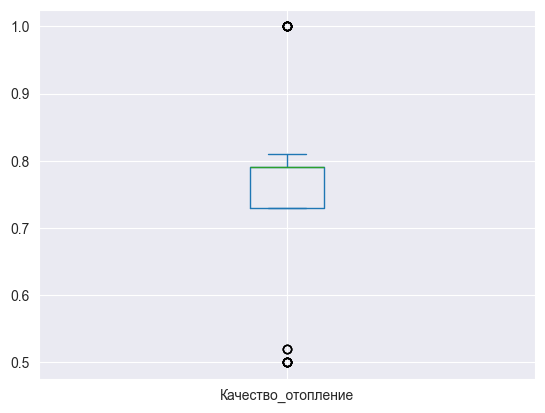

In [651]:
Q1 = df['Качество_отопление'].quantile(0.25)
Q3 = df['Качество_отопление'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR
df['Качество_отопление'].plot(kind='box')

In [652]:
outliers = df[(df['Качество_отопление'] > upper) | (df['Качество_отопление'] < lower)]
outliers.head()

,price_dollars,Серия,Дом,Этаж,Площадь,Отопление,Состояние,Санузел,Газ,Входная дверь,...,местность,адресс,ср_стоим_адресс,Тип предложения_от агента,Тип предложения_от собственника,ср_стоим_серия,ср_стоим_Дом,Этажи/Всего этажей,Площадь (м^2),Качество_отопление
361,28000.0,индивид. планировка,кирпичный,1 этаж из 2,28 м2,без отопления,хорошее,NaN,NaN,NaN,...,Иссык-Кульская область,Чолпон-Ата,41363.636364,False,True,100190.818653,94670.836879,0.50,28,0.5
554,51000.0,108 серия,кирпичный,6 этаж из 11,"52.3 м2, жилая: 52.3 м2",смешанное,под самоотделку (псо),NaN,NaN,бронированная,...,Бишкек,Магистраль,126094.258982,False,True,69777.048193,94670.836879,0.55,52,1.0
793,245000.0,элитка,монолитный,12 этаж из 13,143 м2,без отопления,евроремонт,раздельный,магистральный,бронированная,...,Бишкек,Политех,81286.725000,False,True,116193.784869,112105.293173,0.92,143,0.5
1241,24000.0,элитка,кирпичный,2 этаж из 5,33 м2,смешанное,под самоотделку (псо),NaN,возможно подключение,NaN,...,Сокулук,Nan,54777.288136,True,False,116193.784869,94670.836879,0.40,33,1.0
1311,240000.0,индивид. планировка,"кирпичный, 2014 г.",1 этаж из 5,160 м2,смешанное,хорошее,2 с/у и более,автономный,бронированная,...,Бишкек,Джальская больница,98823.000000,False,True,100190.818653,156063.157895,0.20,160,1.0


In [653]:
df['Качество_отопление'].fillna(df['Качество_отопление'].median(), inplace=True)

In [654]:
df[df['Отопление'] == 'хорошее']

,price_dollars,Серия,Дом,Этаж,Площадь,Отопление,Состояние,Санузел,Газ,Входная дверь,...,местность,адресс,ср_стоим_адресс,Тип предложения_от агента,Тип предложения_от собственника,ср_стоим_серия,ср_стоим_Дом,Этажи/Всего этажей,Площадь (м^2),Качество_отопление


In [655]:
df['Состояние'].unique()

array(['хорошее', 'евроремонт', nan, 'среднее', 'под самоотделку (псо)',
       'не достроено'], dtype=object)

In [656]:
df['Состояние'].isnull().sum()

283

In [657]:
df['Состояние'] = df['Состояние'].apply(
    lambda x: 0 if x == 'не достроено' else 
              1 if pd.isnull(x) else 
              2 if x == 'среднее' else 
              3 if x == 'хорошее' else 
              4)
df

,price_dollars,Серия,Дом,Этаж,Площадь,Отопление,Состояние,Санузел,Газ,Входная дверь,...,местность,адресс,ср_стоим_адресс,Тип предложения_от агента,Тип предложения_от собственника,ср_стоим_серия,ср_стоим_Дом,Этажи/Всего этажей,Площадь (м^2),Качество_отопление
0,67000.0,элитка,"монолитный, 2022 г.",6 этаж из 14,47 м2,автономное,3,совмещенный,магистральный,NaN,...,Бишкек,Магистраль,126094.258982,True,False,116193.784869,110778.078014,0.43,47,0.81
1,54000.0,сталинка,кирпичный,3 этаж из 3,42 м2,центральное,3,совмещенный,магистральный,NaN,...,Бишкек,Политех,81286.725000,True,False,84959.720000,94670.836879,1.00,42,0.79
2,122000.0,элитка,кирпичный,8 этаж из 10,110 м2,центральное,3,раздельный,магистральный,бронированная,...,Бишкек,Джал-29 м-н,90776.666667,True,False,116193.784869,94670.836879,0.80,110,0.79
3,92000.0,элитка,"монолитный, 2024 г.",3 этаж из 12,68 м2,на газе,4,NaN,NaN,NaN,...,Бишкек,Магистраль,126094.258982,False,True,116193.784869,82539.718367,0.25,68,0.73
4,69000.0,элитка,"монолитный, 2020 г.",13 этаж из 14,46 м2,центральное,4,совмещенный,магистральный,бронированная,...,Бишкек,Средний Джал м-н,94780.000000,True,False,116193.784869,142775.978022,0.93,46,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3362,36000.0,индивид. планировка,"монолитный, 2023 г.",2 этаж из 3,25 м2,NaN,4,NaN,NaN,NaN,...,с. Кара-Ой,ул.Рыскулова / Коенкозова,36000.000000,False,True,100190.818653,85166.862661,0.67,25,0.79
3363,223000.0,индивид. планировка,"кирпичный, 2022 г.",15 этаж из 15,"122 м2, жилая: 78.72 м2",NaN,1,NaN,NaN,NaN,...,Бишкек,7 м-н,126661.551020,True,False,100190.818653,114867.309859,1.00,122,0.79
3364,43000.0,индивид. планировка,кирпичный,1 этаж из 2,"54 м2, жилая: 29 м2, кухня: 8 м2",электрическое,3,NaN,NaN,NaN,...,с. Алга,Nan,54777.288136,True,False,100190.818653,94670.836879,0.50,54,0.81
3365,39000.0,108 серия,"монолитный, 2023 г.",4 этаж из 16,27 м2,на газе,4,NaN,NaN,NaN,...,Бишкек,Горького - Алма-Атинская,59111.809091,True,False,69777.048193,85166.862661,0.25,27,0.73


In [658]:
df['Санузел'].unique()

array(['совмещенный', 'раздельный', nan, '2 с/у и более', 'нет'],
      dtype=object)

In [659]:
df['Санузел'] = df['Санузел'].apply(
    lambda x: 1 if x == 'раздельный' else
              2 if x == 'совмещенный' else
              3 if x == '2 с/у и более' else
              0 
)
df

,price_dollars,Серия,Дом,Этаж,Площадь,Отопление,Состояние,Санузел,Газ,Входная дверь,...,местность,адресс,ср_стоим_адресс,Тип предложения_от агента,Тип предложения_от собственника,ср_стоим_серия,ср_стоим_Дом,Этажи/Всего этажей,Площадь (м^2),Качество_отопление
0,67000.0,элитка,"монолитный, 2022 г.",6 этаж из 14,47 м2,автономное,3,2,магистральный,NaN,...,Бишкек,Магистраль,126094.258982,True,False,116193.784869,110778.078014,0.43,47,0.81
1,54000.0,сталинка,кирпичный,3 этаж из 3,42 м2,центральное,3,2,магистральный,NaN,...,Бишкек,Политех,81286.725000,True,False,84959.720000,94670.836879,1.00,42,0.79
2,122000.0,элитка,кирпичный,8 этаж из 10,110 м2,центральное,3,1,магистральный,бронированная,...,Бишкек,Джал-29 м-н,90776.666667,True,False,116193.784869,94670.836879,0.80,110,0.79
3,92000.0,элитка,"монолитный, 2024 г.",3 этаж из 12,68 м2,на газе,4,0,NaN,NaN,...,Бишкек,Магистраль,126094.258982,False,True,116193.784869,82539.718367,0.25,68,0.73
4,69000.0,элитка,"монолитный, 2020 г.",13 этаж из 14,46 м2,центральное,4,2,магистральный,бронированная,...,Бишкек,Средний Джал м-н,94780.000000,True,False,116193.784869,142775.978022,0.93,46,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3362,36000.0,индивид. планировка,"монолитный, 2023 г.",2 этаж из 3,25 м2,NaN,4,0,NaN,NaN,...,с. Кара-Ой,ул.Рыскулова / Коенкозова,36000.000000,False,True,100190.818653,85166.862661,0.67,25,0.79
3363,223000.0,индивид. планировка,"кирпичный, 2022 г.",15 этаж из 15,"122 м2, жилая: 78.72 м2",NaN,1,0,NaN,NaN,...,Бишкек,7 м-н,126661.551020,True,False,100190.818653,114867.309859,1.00,122,0.79
3364,43000.0,индивид. планировка,кирпичный,1 этаж из 2,"54 м2, жилая: 29 м2, кухня: 8 м2",электрическое,3,0,NaN,NaN,...,с. Алга,Nan,54777.288136,True,False,100190.818653,94670.836879,0.50,54,0.81
3365,39000.0,108 серия,"монолитный, 2023 г.",4 этаж из 16,27 м2,на газе,4,0,NaN,NaN,...,Бишкек,Горького - Алма-Атинская,59111.809091,True,False,69777.048193,85166.862661,0.25,27,0.73


In [660]:
df['Газ'] = df['Газ'].apply(
    lambda x: 0 if x == 'нет' or x == 'возможно подключение' or x == 'автономный' else
              1
)
df.drop(columns='Входная дверь', inplace=True)
df

,price_dollars,Серия,Дом,Этаж,Площадь,Отопление,Состояние,Санузел,Газ,Парковка,...,местность,адресс,ср_стоим_адресс,Тип предложения_от агента,Тип предложения_от собственника,ср_стоим_серия,ср_стоим_Дом,Этажи/Всего этажей,Площадь (м^2),Качество_отопление
0,67000.0,элитка,"монолитный, 2022 г.",6 этаж из 14,47 м2,автономное,3,2,1,NaN,...,Бишкек,Магистраль,126094.258982,True,False,116193.784869,110778.078014,0.43,47,0.81
1,54000.0,сталинка,кирпичный,3 этаж из 3,42 м2,центральное,3,2,1,NaN,...,Бишкек,Политех,81286.725000,True,False,84959.720000,94670.836879,1.00,42,0.79
2,122000.0,элитка,кирпичный,8 этаж из 10,110 м2,центральное,3,1,1,паркинг,...,Бишкек,Джал-29 м-н,90776.666667,True,False,116193.784869,94670.836879,0.80,110,0.79
3,92000.0,элитка,"монолитный, 2024 г.",3 этаж из 12,68 м2,на газе,4,0,1,NaN,...,Бишкек,Магистраль,126094.258982,False,True,116193.784869,82539.718367,0.25,68,0.73
4,69000.0,элитка,"монолитный, 2020 г.",13 этаж из 14,46 м2,центральное,4,2,1,паркинг,...,Бишкек,Средний Джал м-н,94780.000000,True,False,116193.784869,142775.978022,0.93,46,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3362,36000.0,индивид. планировка,"монолитный, 2023 г.",2 этаж из 3,25 м2,NaN,4,0,1,NaN,...,с. Кара-Ой,ул.Рыскулова / Коенкозова,36000.000000,False,True,100190.818653,85166.862661,0.67,25,0.79
3363,223000.0,индивид. планировка,"кирпичный, 2022 г.",15 этаж из 15,"122 м2, жилая: 78.72 м2",NaN,1,0,1,NaN,...,Бишкек,7 м-н,126661.551020,True,False,100190.818653,114867.309859,1.00,122,0.79
3364,43000.0,индивид. планировка,кирпичный,1 этаж из 2,"54 м2, жилая: 29 м2, кухня: 8 м2",электрическое,3,0,1,NaN,...,с. Алга,Nan,54777.288136,True,False,100190.818653,94670.836879,0.50,54,0.81
3365,39000.0,108 серия,"монолитный, 2023 г.",4 этаж из 16,27 м2,на газе,4,0,1,NaN,...,Бишкек,Горького - Алма-Атинская,59111.809091,True,False,69777.048193,85166.862661,0.25,27,0.73


In [661]:
df['Парковка'] = df['Парковка'].apply(lambda x:
                    0 if pd.isnull(x) else
                    1
)
df.drop(columns= ['Высота потолков', 'Разное'], inplace=True)
df

,price_dollars,Серия,Дом,Этаж,Площадь,Отопление,Состояние,Санузел,Газ,Парковка,...,местность,адресс,ср_стоим_адресс,Тип предложения_от агента,Тип предложения_от собственника,ср_стоим_серия,ср_стоим_Дом,Этажи/Всего этажей,Площадь (м^2),Качество_отопление
0,67000.0,элитка,"монолитный, 2022 г.",6 этаж из 14,47 м2,автономное,3,2,1,0,...,Бишкек,Магистраль,126094.258982,True,False,116193.784869,110778.078014,0.43,47,0.81
1,54000.0,сталинка,кирпичный,3 этаж из 3,42 м2,центральное,3,2,1,0,...,Бишкек,Политех,81286.725000,True,False,84959.720000,94670.836879,1.00,42,0.79
2,122000.0,элитка,кирпичный,8 этаж из 10,110 м2,центральное,3,1,1,1,...,Бишкек,Джал-29 м-н,90776.666667,True,False,116193.784869,94670.836879,0.80,110,0.79
3,92000.0,элитка,"монолитный, 2024 г.",3 этаж из 12,68 м2,на газе,4,0,1,0,...,Бишкек,Магистраль,126094.258982,False,True,116193.784869,82539.718367,0.25,68,0.73
4,69000.0,элитка,"монолитный, 2020 г.",13 этаж из 14,46 м2,центральное,4,2,1,1,...,Бишкек,Средний Джал м-н,94780.000000,True,False,116193.784869,142775.978022,0.93,46,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3362,36000.0,индивид. планировка,"монолитный, 2023 г.",2 этаж из 3,25 м2,NaN,4,0,1,0,...,с. Кара-Ой,ул.Рыскулова / Коенкозова,36000.000000,False,True,100190.818653,85166.862661,0.67,25,0.79
3363,223000.0,индивид. планировка,"кирпичный, 2022 г.",15 этаж из 15,"122 м2, жилая: 78.72 м2",NaN,1,0,1,0,...,Бишкек,7 м-н,126661.551020,True,False,100190.818653,114867.309859,1.00,122,0.79
3364,43000.0,индивид. планировка,кирпичный,1 этаж из 2,"54 м2, жилая: 29 м2, кухня: 8 м2",электрическое,3,0,1,0,...,с. Алга,Nan,54777.288136,True,False,100190.818653,94670.836879,0.50,54,0.81
3365,39000.0,108 серия,"монолитный, 2023 г.",4 этаж из 16,27 м2,на газе,4,0,1,0,...,Бишкек,Горького - Алма-Атинская,59111.809091,True,False,69777.048193,85166.862661,0.25,27,0.73


In [663]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3364 entries, 0 to 3366
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price_dollars                    3364 non-null   float64
 1   Серия                            3364 non-null   object 
 2   Дом                              3364 non-null   object 
 3   Этаж                             3361 non-null   object 
 4   Площадь                          3364 non-null   object 
 5   Отопление                        2807 non-null   object 
 6   Состояние                        3364 non-null   int64  
 7   Санузел                          3364 non-null   int64  
 8   Газ                              3364 non-null   int64  
 9   Парковка                         3364 non-null   int64  
 10  Правоустанавливающие документы   1916 non-null   object 
 11  upped                            2871 non-null   object 
 12  Телефон                  